# BUSINESS METRICS

# NPS (Net Promoter Score)

 Net Promoter Score is the percentage of promoters minus the percentage of detractors

In [22]:
import pandas as pd
import datetime as dt

df = pd.read_csv("nps.csv", parse_dates=["event_date"])

def categorize(score):
    """Returns NPS category"""
    if score in range(0,7):
        return "Detractor"
    elif score in (7, 8):
        return "Passive"
    elif score in (9,10):
        return "Promoter"
    return None


year=df['event_date'].dt.year
month=df['event_date'].dt.month
df['yearmonth']=100*year + month

df['category']=df['score'].apply(categorize)

nps=df.pivot_table(index='yearmonth',columns='category',aggfunc='size')

nps['total_responses']=nps.sum(axis='columns')

nps['nps']=(nps['Promoter']-nps['Detractor'])/nps['total_responses']
nps['nps']=(100*nps['nps']).astype(int)

In [23]:
df

,event_date,user_id,score,yearmonth,category
0,2020-01-01 19:00:51,290067447,8,202001,Passive
1,2020-01-02 17:34:43,223014806,10,202001,Promoter
2,2020-01-02 19:11:55,187864388,10,202001,Promoter
3,2020-01-02 19:27:00,318758952,8,202001,Passive
4,2020-01-02 21:42:19,189933311,0,202001,Detractor
...,...,...,...,...,...
3321,2020-12-30 21:24:28,289219785,8,202012,Passive
3322,2020-12-31 02:01:19,187133285,7,202012,Passive
3323,2020-12-31 05:30:00,202035502,10,202012,Promoter
3324,2020-12-31 06:12:32,196225609,10,202012,Promoter


In [24]:
nps

category,Detractor,Passive,Promoter,total_responses,nps
yearmonth,,,,,
202001,31,82,215,328,56
202002,22,90,161,273,50
202003,33,72,125,230,40
202004,36,87,178,301,47
202005,33,83,191,307,51
202006,32,80,215,327,55
202007,48,95,258,401,52
202008,40,103,256,399,54
202009,18,68,135,221,52


Text(0.5, 0, '')

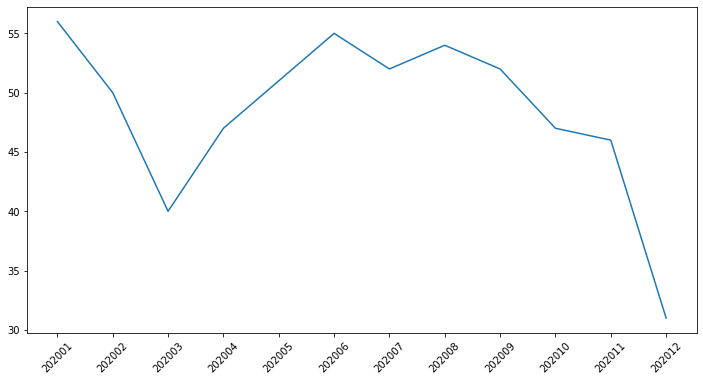

In [25]:
ax = nps.reset_index().plot(kind="line", x="yearmonth",y="nps",
                            figsize=(12,6), legend=False
                           )
ax.set_xticks(nps.index)
ax.set_xticklabels(nps.index, rotation=45)
ax.axes.get_xaxis().set_label_text("")

# Churn (when customer stops being a customer)

In [26]:
import pandas as pd

subs=pd.read_csv('muscle_labs.csv',parse_dates=['end_date','start_date'])

year=subs['end_date'].dt.year
month=subs['end_date'].dt.month

subs['churn_month']=100*year+month

subs


,id,customer_id,end_date,start_date,subscription_period,price,churn_month
0,5,1337,2014-12-28 01:40:57,2014-10-25 12:39:18,monthly,50,201412
1,28,1338,2014-11-19 01:48:05,2014-10-17 13:47:59,monthly,50,201411
2,44,1339,2014-11-01 20:56:37,2014-10-30 05:50:54,annual,500,201411
3,85,1340,2014-12-09 02:51:57,2013-12-05 14:51:57,annual,500,201412
4,168,1341,2015-11-16 09:19:29,2014-11-13 20:19:23,annual,500,201511
...,...,...,...,...,...,...,...
10492,18069,12456,2015-01-20 13:54:39,2014-09-19 00:38:00,monthly,50,201501
10493,18068,12457,2015-01-20 13:38:29,2014-10-19 00:23:00,monthly,50,201501
10494,319,12458,2015-01-20 10:16:19,2014-11-18 21:09:16,monthly,50,201501
10495,343,12460,2015-01-20 18:50:56,2014-11-19 05:50:32,monthly,50,201501


In [27]:
monthly_churn=pd.DataFrame({'total_churned':subs.groupby('churn_month').size()})
monthly_churn

,total_churned
churn_month,
201103,8
201104,16
201105,29
201106,27
201107,37
201108,40
201109,39
201110,47
201111,45


In [28]:
print(subs["start_date"].min())

2011-01-05 13:55:00


In [29]:
years = list(range(2011,2015))
months = list(range(1,13))
yearmonths = [y*100+m for y in years for m in months]
print(yearmonths)

[201101, 201102, 201103, 201104, 201105, 201106, 201107, 201108, 201109, 201110, 201111, 201112, 201201, 201202, 201203, 201204, 201205, 201206, 201207, 201208, 201209, 201210, 201211, 201212, 201301, 201302, 201303, 201304, 201305, 201306, 201307, 201308, 201309, 201310, 201311, 201312, 201401, 201402, 201403, 201404, 201405, 201406, 201407, 201408, 201409, 201410, 201411, 201412]


In [30]:
yearmonths = yearmonths[:-1]
churn = pd.DataFrame({"yearmonth": yearmonths})
churn.head()

,yearmonth
0,201101
1,201102
2,201103
3,201104
4,201105


In [31]:
churn=pd.merge(churn,monthly_churn, how='left', left_on='yearmonth',right_index= True)
churn.head()

,yearmonth,total_churned
0,201101,NaN
1,201102,NaN
2,201103,8.0
3,201104,16.0
4,201105,29.0


In [32]:
churn.fillna(0,inplace=True)
churn['total_churned']=churn['total_churned'].astype(int)
churn

,yearmonth,total_churned
0,201101,0
1,201102,0
2,201103,8
3,201104,16
4,201105,29
5,201106,27
6,201107,37
7,201108,40
8,201109,39
9,201110,47


In [34]:
def get_customers(yearmonth):
    year=yearmonth//100
    month=yearmonth-year*100
    date=dt.datetime(year,month,1)
    
    return ((subs["start_date"] < date) & (date <= subs["end_date"])).sum()

churn['total_customers']=churn['yearmonth'].apply(get_customers)

churn['churn_rate']=churn['total_churned']/churn['total_customers']

churn["yearmonth"] = churn["yearmonth"].astype(str)

In [35]:
churn

,yearmonth,total_churned,total_customers,churn_rate
0,201101,0,0,NaN
1,201102,0,17,0.000000
2,201103,8,47,0.170213
3,201104,16,82,0.195122
4,201105,29,105,0.276190
5,201106,27,155,0.174194
6,201107,37,194,0.190722
7,201108,40,220,0.181818
8,201109,39,247,0.157895
9,201110,47,254,0.185039


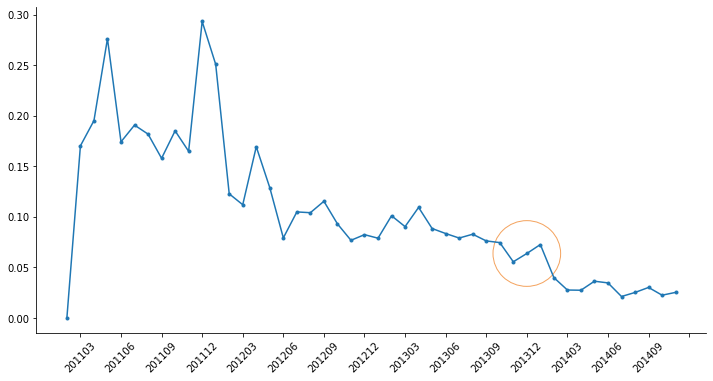

In [36]:
arange = __import__("numpy").arange
Ellipse = __import__("matplotlib").patches.Ellipse
ax = churn.plot(x="yearmonth", y="churn_rate", figsize=(12,6), rot=45, marker=".")
start, end = ax.get_xlim()
ax.get_xticks()
ax.set_xticks(arange(2, end, 3))
ax.set_xticklabels(yearmonths[2::3])
circle = Ellipse((35, churn.loc[churn.yearmonth == "201312", "churn_rate"].iloc[0]),
                 5, 0.065, color='sandybrown', fill=False
                   )
ax.add_artist(circle)
ax.xaxis.label.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_legend().remove()

The churn rate is very erratic at the beginning;

In the months prior to you taking over the business in January of 2013, the churn rate started to become more stable.

After you took over the business, there was a spike in churn. This is not surprising, maybe people just took the opportunity to change gyms or quit.

At the end of 2013 and beginning of 2014, there was a relatively large spike in the churn rate.

It had been almost one year since you had taken over the business, so you naturally decide to investigate what could have led to this spike.

Due to your domain knowledge and intuition, you suspect that drilling down into the behavior of the churn rate by type of suscription (monthly vs. annual) may give you some clues. You repeat the analysis for each of these segments.


It seems the spike in churn originates from the monthly plans in December and from the annual plans in January. Your intuition was correct!

Looking at the annual graph you immediately remember that when you took over the business in January of 2013, you made a promo where people could sign up for a year for 500 dollars. What you're seeing here is the churn due to that promotion. Maybe people don't want to pay $50 per month, or maybe they had already quit a few months prior.

A few actions that you could take to reactivate these customers are:

Make a new promotion specifically for the quitters.
Make a new promotion specifically for the customers who attended the gym up until the end.
Throw in some perks in addition to the standard service for the customers who didn't quit.
As for the monthly plan churned customers, you think back to recent changes in the service to try to figure out why they quit. Nothing comes to mind, you have no idea.

You decide to reach out to these customers and offer them a one-day pass for the gym in exchange for their feedback. Hopefully you can get some insights and act on them.

